In [1]:
import numpy as np 
import librosa.display 
import soundfile as sf 
import matplotlib.pyplot as plt 
import sys 
from scipy import signal 
from scipy.signal import chirp 
from scipy.signal import ShortTimeFFT 
from scipy.signal.windows import gaussian 


Fd = 44100
T = 3
N = round(T*Fd) 


In [2]:
def get_waves(f, Fd, N): 
    model_signal = np.zeros((2,N)) 
    t = np.arange(N) / Fd
    
    signal_m = np.sign(np.sin(2 * np.pi * f * t))
    signal = np.vstack((signal_m, signal_m)) 
    
    return signal
 

In [3]:
freq = 432

model_signal = get_waves(freq, Fd, N) 
 

In [4]:
Norm = np.max(np.abs(model_signal)) 
if Norm != 0: 
    model_signal = model_signal / Norm


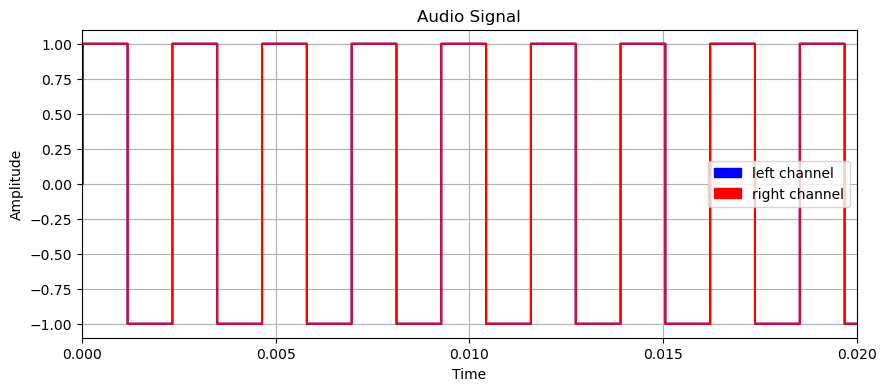

In [5]:

start_t, stop_t = 0, 0.02
 
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10, 4)) 
ax.set(xlim=[start_t, stop_t]) 
librosa.display.waveshow(model_signal[0, :], 
                         sr=Fd, color='b', ax=ax,  
                         label='left channel') 

librosa.display.waveshow(model_signal[1, :], 
                         sr=Fd, color='r', ax=ax,  
                         label='right channel') 
ax.label_outer() 
ax.legend() 
ax.grid() 
plt.xlabel('Time') 
plt.ylabel('Amplitude') 
plt.title('Audio Signal') 
plt.show() 
 
sf.write('D:/signal.wav', np.transpose(model_signal), Fd)


In [6]:

input_signal, Fd = librosa.load('D:/signal.wav', sr=None, mono=False)

K, N = input_signal.shape
T = N / Fd


In [7]:
def print_signal(start, stop, N, Fd):

    t = np.arange(N) / Fd
    
    plt.figure(figsize=(10, 4))
    plt.xlim(start, stop)
    plt.plot(t, input_signal[0], color='b', label='left channel')
    plt.plot(t, input_signal[1], color='r', label='right channel')
   
    plt.grid()
    plt.xlabel('Time') 
    plt.ylabel('Amplitude') 
    plt.title('Audio Signal')
    plt.legend()
    plt.show()
    

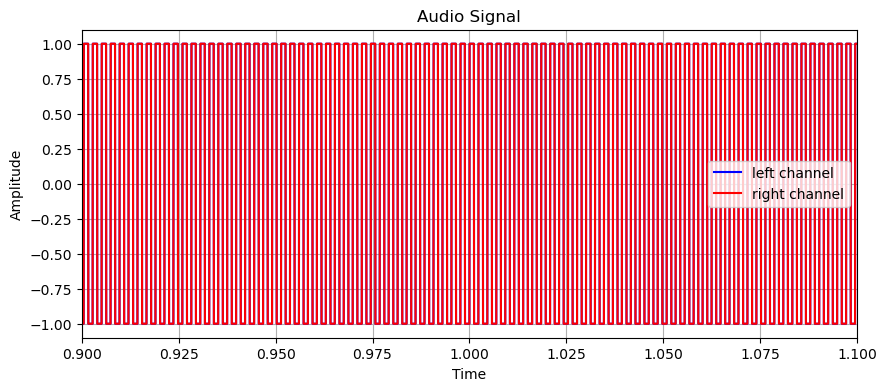

In [8]:
print_signal(0.9, 1.1, N, Fd)

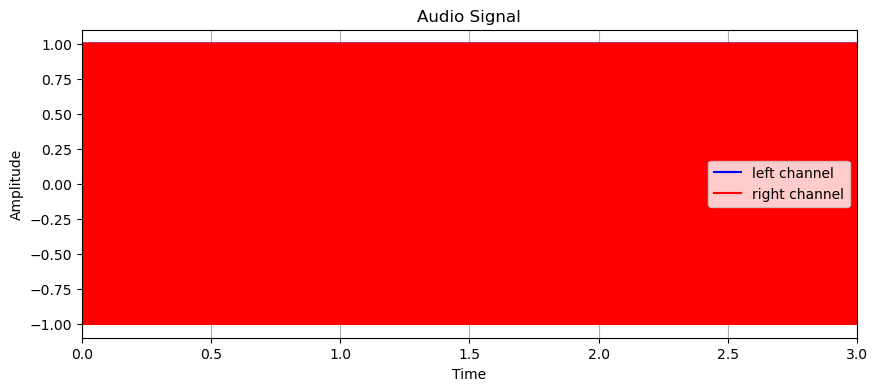

In [9]:
print_signal(0, 3, N, Fd)

In [10]:
plt.close('all')

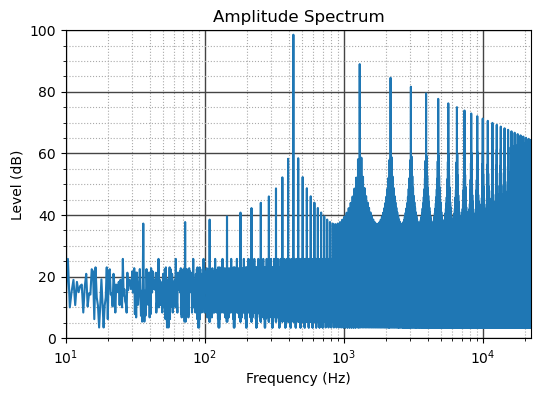

In [11]:

Spectr_input = np.fft.fft(input_signal[0])

AS_input = np.abs(Spectr_input)
eps = np.max(AS_input) * 1.0e-9
S_dB_input = 20 * np.log10(AS_input + eps)
 
f = np.arange(0, Fd/2, Fd/N)
S_dB_input = S_dB_input[:len(f)]

plt.figure(figsize=(6, 4)) 
plt.semilogx(f, S_dB_input)
plt.grid() 
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1) 
plt.grid(which='minor', color='#aaa', ls=':') 
 
Max_dB = np.ceil(np.max(S_dB_input)/20)*20 
plt.axis([10, Fd/2, Max_dB-100, Max_dB])
 
plt.xlabel('Frequency (Hz)') 
plt.ylabel('Level (dB)') 
plt.title('Amplitude Spectrum') 
plt.show()


4657616


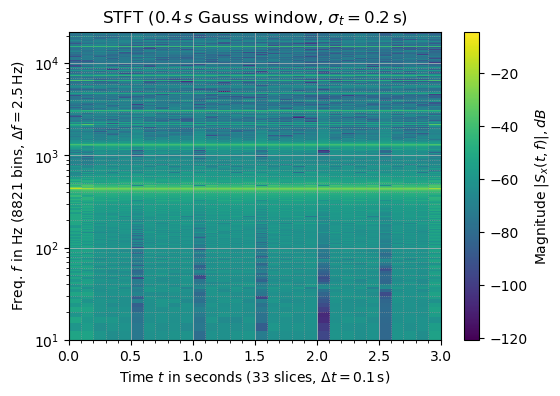

In [12]:

g_std = 0.2*Fd 
wind = gaussian(round(2*g_std), std=g_std, sym=True) 
 
SFT = ShortTimeFFT(wind, 
                   hop=round(0.1*Fd),
                   fs=Fd, 
                   scale_to='magnitude') 
 
Sx = SFT.stft(input_signal[0])
print(sys.getsizeof(Sx))
 

fig1, ax1 = plt.subplots(figsize=(6, 4)) 
t_lo, t_hi = SFT.extent(N)[:2]
 
ax1.set_title(rf"STFT ({SFT.m_num*SFT.T:g}$\,s$ Gauss window, "+ 
              rf"$\sigma_t={g_std*SFT.T}\,$s)") 
 
ax1.set(xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, "+ 
               rf"$\Delta t = {SFT.delta_t:g}\,$s)", 
               ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, "+ 
               rf"$\Delta f = {SFT.delta_f:g}\,$Hz)", 
               xlim=(t_lo, t_hi)) 
 
epss=np.max(abs(Sx))*1e-6 
im1 = ax1.imshow(20*np.log10(abs(Sx)+epss),  
origin='lower', aspect='auto', 
extent=SFT.extent(N), cmap='viridis') 
fig1.colorbar(im1, label="Magnitude $|S_x(t, f)|, dB $") 
 
ax1.semilogy() 
ax1.set_xlim([0, T]) 
ax1.set_ylim([10, Fd/2])

ax1.grid(which='major', color='#bbbbbb', linewidth=0.5) 
ax1.grid(which='minor', color='#999999', linestyle=':', 
         linewidth=0.5) 
ax1.minorticks_on() 
plt.show()
